In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('data/Original Data/Local_Law_84_2019__Monthly_Data_for_Calendar_Year_2018__20231026.csv')
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,18-Jan,Not Available,2191816.3
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,18-Feb,Not Available,1881934
2,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,18-Mar,Not Available,1960262.3
3,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,18-Apr,Not Available,1842159.3
4,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,18-May,Not Available,1893434.5


In [3]:
df['Property Id'].nunique()

25794

In [4]:
df.shape

(309528, 7)

In [5]:
import os
def save_to_folder(data, itn):
    os.makedirs('data/CleanedData/Monthly Data/Attempt_1', exist_ok=True)
    data.to_csv(f'data/CleanedData/Monthly Data/Attempt_1/Iteration_{itn}.csv',index=False)

In [6]:
save_to_folder(df, 1)

In [7]:
df['Month']=df['Month'].str.replace('18-', '')

In [8]:
df['Month']

0         Jan
1         Feb
2         Mar
3         Apr
4         May
         ... 
309523    Aug
309524    Sep
309525    Oct
309526    Nov
309527    Dec
Name: Month, Length: 309528, dtype: object

In [9]:
save_to_folder(df, 2)

In [10]:
df.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan,Not Available,2191816.3
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb,Not Available,1881934
2,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Mar,Not Available,1960262.3
3,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Apr,Not Available,1842159.3
4,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,May,Not Available,1893434.5


In [11]:
df.drop(columns=['Parent Property Id', 'Parent Property Name'], inplace=True)

In [12]:
df.shape

(309528, 5)

In [13]:
df.head()

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Jan,Not Available,2191816.3
1,7365,1155,Feb,Not Available,1881934
2,7365,1155,Mar,Not Available,1960262.3
3,7365,1155,Apr,Not Available,1842159.3
4,7365,1155,May,Not Available,1893434.5


In [14]:
df.isna().sum()

Property Id                0
Property Name              0
Month                      0
Natural Gas Use  (kBtu)    0
Electricity Use  (kBtu)    0
dtype: int64

In [15]:
df.replace("Not Available", np.nan, inplace=True)

In [16]:
df.isna().sum()

Property Id                    0
Property Name                  0
Month                          0
Natural Gas Use  (kBtu)    39099
Electricity Use  (kBtu)     7530
dtype: int64

In [17]:
df['Month']=pd.to_datetime(df['Month'], format='%b').dt.strftime('%b')

In [18]:
df.dtypes

Property Id                 int64
Property Name              object
Month                      object
Natural Gas Use  (kBtu)    object
Electricity Use  (kBtu)    object
dtype: object

In [19]:
df=df[df['Month'].isin(['Jun', 'Jul', 'Aug'])]
df.reset_index(drop=True, inplace=True)
df.head()

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Jun,NaN,1928829.3
1,7365,1155,Jul,NaN,2168239.6
2,7365,1155,Aug,NaN,2198702
3,8139,200,Jun,NaN,1518119.3
4,8139,200,Jul,NaN,1601837.8


In [20]:
df

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Jun,NaN,1928829.3
1,7365,1155,Jul,NaN,2168239.6
2,7365,1155,Aug,NaN,2198702
3,8139,200,Jun,NaN,1518119.3
4,8139,200,Jul,NaN,1601837.8
...,...,...,...,...,...
77377,9642581,227 East 56th Street,Jul,90061.8,179641.1
77378,9642581,227 East 56th Street,Aug,97366.7,202051.8
77379,9643128,3650 Bronx Boulevard,Jun,25400,49454.2
77380,9643128,3650 Bronx Boulevard,Jul,24593.1,65282.8


In [21]:
save_to_folder(df, 3)

In [22]:
df.shape

(77382, 5)

In [23]:
df.isna().sum()

Property Id                    0
Property Name                  0
Month                          0
Natural Gas Use  (kBtu)    11278
Electricity Use  (kBtu)     1890
dtype: int64

In [24]:
df1=df

In [25]:
df2=pd.read_csv('data/CleanedData/Energy_Water_Disclosure/Attempt 2/Energy_Water_Disclosure_Cleaned.csv')

In [26]:
df1.columns

Index(['Property Id', 'Property Name', 'Month', 'Natural Gas Use  (kBtu)',
       'Electricity Use  (kBtu)'],
      dtype='object')

In [27]:
df2.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type', 'Year Built', 'Number of Buildings',
       'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'Source Energy Use - Adjusted to Current Year (kBtu)',
       'Source Energy Use (kBtu)',
       'Weather Normalized Sourc

In [28]:
df1.head()

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,1155,Jun,NaN,1928829.3
1,7365,1155,Jul,NaN,2168239.6
2,7365,1155,Aug,NaN,2198702
3,8139,200,Jun,NaN,1518119.3
4,8139,200,Jul,NaN,1601837.8


In [29]:
df1.isna().sum()

Property Id                    0
Property Name                  0
Month                          0
Natural Gas Use  (kBtu)    11278
Electricity Use  (kBtu)     1890
dtype: int64

In [30]:
df1[df1['Property Id']==13286]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
15,13286,201/205,Jun,213423.8,3109755.9
16,13286,201/205,Jul,225945.2,3374906.1
17,13286,201/205,Aug,205331.7,3476929.6


In [31]:
df2[df2['Property Id']==13286]

,Property Id,Property Name,Address 1,City,Postcode,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,Year Built,Number of Buildings,Occupancy,...,Water Score (Multifamily Only),Irrigated Area (ft²),Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Total Property Gross Floor Area


In [32]:
df1.columns=df1.columns.str.strip()
df2.columns=df2.columns.str.strip()

In [33]:
df2.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postcode',
       'Primary Property Type - Portfolio Manager-Calculated',
       'Largest Property Use Type', 'Year Built', 'Number of Buildings',
       'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'National Median Site EUI (kBtu/ft²)',
       '% Difference from National Median Site EUI', 'Site Energy Use (kBtu)',
       'Weather Normalized Site Energy Use (kBtu)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'National Median Source EUI (kBtu/ft²)',
       '% Difference from National Median Source EUI',
       'Source Energy Use - Adjusted to Current Year (kBtu)',
       'Source Energy Use (kBtu)',
       'Weather Normalized Sourc

In [34]:
df1.shape

(77382, 5)

In [35]:
df2.shape

(22324, 59)

In [36]:
print("df1:",df1['Property Id'].nunique())
print("df2:",df2['Property Id'].nunique())

df1: 25794
df2: 21921


In [37]:
merged_df=df1.merge(df2[['Property Id', 'Postcode', 'NTA', 'Borough']], how='inner', on='Property Id')

In [38]:
merged_df[merged_df['Property Id']==13286]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough


In [39]:
merged_df.iloc[30:51, :]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough
30,1143922,NE - 111 WALL STREET,Jun,NaN,3840819,10005,Battery Park City-Lower Manhattan,MANHATTAN
31,1143922,NE - 111 WALL STREET,Jul,NaN,3944545.4,10005,Battery Park City-Lower Manhattan,MANHATTAN
32,1143922,NE - 111 WALL STREET,Aug,NaN,3799803.3,10005,Battery Park City-Lower Manhattan,MANHATTAN
33,1143934,NE - 388 GREENWICH STREET,Jun,663300,7929489,10013,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
34,1143934,NE - 388 GREENWICH STREET,Jul,1978296.9,8491789.7,10013,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
35,1143934,NE - 388 GREENWICH STREET,Aug,1791619.9,8792046.4,10013,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
36,1151970,1133,Jun,27225,4604801.4,10036,Midtown-Midtown South,MANHATTAN
37,1151970,1133,Jul,NaN,5185657,10036,Midtown-Midtown South,MANHATTAN
38,1151970,1133,Aug,NaN,5136786.7,10036,Midtown-Midtown South,MANHATTAN
39,1160595,"STATEN ISLAND, NY-2463",Jun,12730,673938.3,10314,Todt Hill-Emerson Hill-Heartland Village-Light...,STATEN IS


In [40]:
merged_df.isna().sum()

Property Id                   0
Property Name                 0
Month                         0
Natural Gas Use  (kBtu)    8390
Electricity Use  (kBtu)    1441
Postcode                      0
NTA                           0
Borough                       0
dtype: int64

In [41]:
merged_df.shape

(66972, 8)

In [42]:
merged_df['Natural Gas Use  (kBtu)']=merged_df['Natural Gas Use  (kBtu)'].astype('float64')
merged_df['Electricity Use  (kBtu)']=merged_df['Electricity Use  (kBtu)'].astype('float64')

In [43]:
save_to_folder(merged_df, 4)

In [44]:
merged_df['Property Id'].nunique()

21921

In [45]:
df1['Property Id'].nunique()

25794

In [46]:
df2['Property Id'].nunique()

21921

In [47]:
merged_df[merged_df['Property Id']==13286]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough


In [48]:
def custom_mean(series):
    return series.mean() if not series.isnull().any() else np.nan

In [49]:
result=merged_df.groupby('Property Id').agg({
    'Natural Gas Use  (kBtu)': custom_mean,
    'Electricity Use  (kBtu)': custom_mean}).reset_index()

In [50]:
merged_df['Property Id'].nunique()

21921

In [51]:
result['Property Id'].nunique()

21921

In [52]:
result.head(30)

,Property Id,Natural Gas Use (kBtu),Electricity Use (kBtu)
0,7365,NaN,2.098590e+06
1,8139,NaN,1.651919e+06
2,8604,7.252220e+04,2.516934e+06
3,8841,NaN,1.495032e+06
4,11809,4.203740e+05,9.892624e+06
5,28402,1.422811e+08,9.684590e+06
6,28404,2.229867e+06,3.627709e+06
7,1045358,NaN,4.541031e+06
8,1052478,5.037500e+04,6.850193e+06
9,1069082,NaN,6.199643e+06


In [53]:
result[result['Property Id']==13286]

,Property Id,Natural Gas Use (kBtu),Electricity Use (kBtu)


In [54]:
result.columns=['Property Id', 'Average Summer Gas Usage (kBtu)', 'Average Summer Electricity Usage (kBtu)']

In [55]:
result.head()

,Property Id,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,NaN,2.098590e+06
1,8139,NaN,1.651919e+06
2,8604,72522.2,2.516934e+06
3,8841,NaN,1.495032e+06
4,11809,420374.0,9.892624e+06


In [56]:
merged_df.head()

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough
0,7365,1155,Jun,NaN,1928829.3,10036,Midtown-Midtown South,MANHATTAN
1,7365,1155,Jul,NaN,2168239.6,10036,Midtown-Midtown South,MANHATTAN
2,7365,1155,Aug,NaN,2198702.0,10036,Midtown-Midtown South,MANHATTAN
3,8139,200,Jun,NaN,1518119.3,10017,Turtle Bay-East Midtown,MANHATTAN
4,8139,200,Jul,NaN,1601837.8,10017,Turtle Bay-East Midtown,MANHATTAN


In [57]:
combined_df=merged_df.merge(result, on='Property Id', how='left').head(20)
combined_df

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,Jun,NaN,1928829.3,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
1,7365,1155,Jul,NaN,2168239.6,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
2,7365,1155,Aug,NaN,2198702.0,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
3,8139,200,Jun,NaN,1518119.3,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
4,8139,200,Jul,NaN,1601837.8,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
5,8139,200,Aug,NaN,1835799.0,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
6,8604,114,Jun,73123.3,2333534.9,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
7,8604,114,Jul,71370.4,2615077.1,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
8,8604,114,Aug,73072.9,2602189.3,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
9,8841,733,Jun,NaN,1405418.6,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.495032e+06


In [58]:
merged_df[merged_df['Property Id']==13286]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough


In [59]:
df1[df1['Property Id']==13286]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
15,13286,201/205,Jun,213423.8,3109755.9
16,13286,201/205,Jul,225945.2,3374906.1
17,13286,201/205,Aug,205331.7,3476929.6


In [60]:
df2[df2['Property Id']==13286]

,Property Id,Property Name,Address 1,City,Postcode,Primary Property Type - Portfolio Manager-Calculated,Largest Property Use Type,Year Built,Number of Buildings,Occupancy,...,Water Score (Multifamily Only),Irrigated Area (ft²),Borough,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,Total Property Gross Floor Area


In [61]:
df1['Property Id'].nunique()

25794

In [62]:
df2['Property Id'].nunique()

21921

In [63]:
merged_df['Property Id'].nunique()

21921

In [64]:
result['Property Id'].nunique()

21921

In [65]:
result.head(30)

,Property Id,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,NaN,2.098590e+06
1,8139,NaN,1.651919e+06
2,8604,7.252220e+04,2.516934e+06
3,8841,NaN,1.495032e+06
4,11809,4.203740e+05,9.892624e+06
5,28402,1.422811e+08,9.684590e+06
6,28404,2.229867e+06,3.627709e+06
7,1045358,NaN,4.541031e+06
8,1052478,5.037500e+04,6.850193e+06
9,1069082,NaN,6.199643e+06


In [66]:
final_df=merged_df.merge(result, on='Property Id', how='left')

In [67]:
final_df.head(30)

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,Jun,NaN,1928829.3,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
1,7365,1155,Jul,NaN,2168239.6,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
2,7365,1155,Aug,NaN,2198702.0,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
3,8139,200,Jun,NaN,1518119.3,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
4,8139,200,Jul,NaN,1601837.8,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
5,8139,200,Aug,NaN,1835799.0,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
6,8604,114,Jun,73123.3,2333534.9,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
7,8604,114,Jul,71370.4,2615077.1,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
8,8604,114,Aug,73072.9,2602189.3,10036,Midtown-Midtown South,MANHATTAN,7.252220e+04,2.516934e+06
9,8841,733,Jun,NaN,1405418.6,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.495032e+06


In [68]:
final_df

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,Jun,NaN,1928829.3,10036,Midtown-Midtown South,MANHATTAN,NaN,2098590.3
1,7365,1155,Jul,NaN,2168239.6,10036,Midtown-Midtown South,MANHATTAN,NaN,2098590.3
2,7365,1155,Aug,NaN,2198702.0,10036,Midtown-Midtown South,MANHATTAN,NaN,2098590.3
3,8139,200,Jun,NaN,1518119.3,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1651918.7
4,8139,200,Jul,NaN,1601837.8,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1651918.7
...,...,...,...,...,...,...,...,...,...,...
66967,7538696,Polyclinic,Jul,98958.0,587621.7,10019,Clinton,MANHATTAN,96066.333333,553272.0
66968,7538696,Polyclinic,Aug,88254.0,589423.5,10019,Clinton,MANHATTAN,96066.333333,553272.0
66969,7538791,Child1_Manhattan Beach,Jun,NaN,NaN,11235,Brighton Beach,BROOKLYN,NaN,NaN
66970,7538791,Child1_Manhattan Beach,Jul,NaN,NaN,11235,Brighton Beach,BROOKLYN,NaN,NaN


In [69]:
final_df['Property Id'].nunique()

21921

In [70]:
save_to_folder(final_df, 5)

In [71]:
final_df.drop_duplicates(subset=['Property Id'], inplace=True, ignore_index=True)

In [72]:
final_df

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu),Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,Jun,NaN,1928829.3,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
1,8139,200,Jun,NaN,1518119.3,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
2,8604,114,Jun,73123.3,2333534.9,10036,Midtown-Midtown South,MANHATTAN,72522.200000,2.516934e+06
3,8841,733,Jun,NaN,1405418.6,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.495032e+06
4,11809,Conde Nast Building,Jun,608842.0,9333440.6,10036,Midtown-Midtown South,MANHATTAN,420374.000000,9.892624e+06
...,...,...,...,...,...,...,...,...,...,...
21916,7538500,100 Belmont Place,Jun,52900.0,103789.9,10301,West New Brighton-New Brighton-St. George,STATEN IS,50400.000000,1.349870e+05
21917,7538585,175 WEST 137 STREET,Jun,NaN,82768.6,10030,Central Harlem North-Polo Grounds,MANHATTAN,NaN,9.689617e+04
21918,7538695,91 Davis Avenue and 102 Bard Avenue,Jun,94600.0,56565.5,10310,West New Brighton-New Brighton-St. George,STATEN IS,95766.666667,8.767820e+04
21919,7538696,Polyclinic,Jun,100987.0,482770.8,10019,Clinton,MANHATTAN,96066.333333,5.532720e+05


In [73]:
final_df.drop(columns=['Month', 'Natural Gas Use  (kBtu)', 'Electricity Use  (kBtu)'], inplace=True)

In [74]:
save_to_folder(final_df, 6)

In [75]:
final_df['Property Id'].nunique()

21921

In [76]:
final_df

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
1,8139,200,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
2,8604,114,10036,Midtown-Midtown South,MANHATTAN,72522.200000,2.516934e+06
3,8841,733,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.495032e+06
4,11809,Conde Nast Building,10036,Midtown-Midtown South,MANHATTAN,420374.000000,9.892624e+06
...,...,...,...,...,...,...,...
21916,7538500,100 Belmont Place,10301,West New Brighton-New Brighton-St. George,STATEN IS,50400.000000,1.349870e+05
21917,7538585,175 WEST 137 STREET,10030,Central Harlem North-Polo Grounds,MANHATTAN,NaN,9.689617e+04
21918,7538695,91 Davis Avenue and 102 Bard Avenue,10310,West New Brighton-New Brighton-St. George,STATEN IS,95766.666667,8.767820e+04
21919,7538696,Polyclinic,10019,Clinton,MANHATTAN,96066.333333,5.532720e+05


In [77]:
final_df.isna().sum()

Property Id                                   0
Property Name                                 0
Postcode                                      0
NTA                                           0
Borough                                       0
Average Summer Gas Usage (kBtu)            3011
Average Summer Electricity Usage (kBtu)     493
dtype: int64

In [78]:
final_df.shape

(21921, 7)

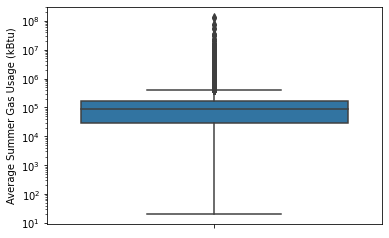

In [79]:
sns.boxplot(y=final_df['Average Summer Gas Usage (kBtu)'])
plt.yscale('log')

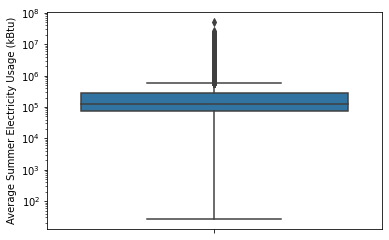

In [80]:
sns.boxplot(y=final_df['Average Summer Electricity Usage (kBtu)'])
plt.yscale('log')

#### We have outliers here. We can use median to impute missing values

In [81]:
final_df

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,7365,1155,10036,Midtown-Midtown South,MANHATTAN,NaN,2.098590e+06
1,8139,200,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.651919e+06
2,8604,114,10036,Midtown-Midtown South,MANHATTAN,72522.200000,2.516934e+06
3,8841,733,10017,Turtle Bay-East Midtown,MANHATTAN,NaN,1.495032e+06
4,11809,Conde Nast Building,10036,Midtown-Midtown South,MANHATTAN,420374.000000,9.892624e+06
...,...,...,...,...,...,...,...
21916,7538500,100 Belmont Place,10301,West New Brighton-New Brighton-St. George,STATEN IS,50400.000000,1.349870e+05
21917,7538585,175 WEST 137 STREET,10030,Central Harlem North-Polo Grounds,MANHATTAN,NaN,9.689617e+04
21918,7538695,91 Davis Avenue and 102 Bard Avenue,10310,West New Brighton-New Brighton-St. George,STATEN IS,95766.666667,8.767820e+04
21919,7538696,Polyclinic,10019,Clinton,MANHATTAN,96066.333333,5.532720e+05


In [82]:
df2['Borough'].value_counts()

MANHATTAN    8705
BROOKLYN     5228
BRONX        4448
QUEENS       3604
STATEN IS     339
Name: Borough, dtype: int64

In [83]:
df1[df1['Property Id']==1633413]

,Property Id,Property Name,Month,Natural Gas Use (kBtu),Electricity Use (kBtu)
950,1633413,Q163-0400148,Jun,6400,337105.5
951,1633413,Q163-0400148,Jul,NaN,272960
952,1633413,Q163-0400148,Aug,NaN,293432


In [84]:
final_df[final_df['Property Id']==1633413]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
300,1633413,Q163-0400148,11365,Queensboro Hill,QUEENS,NaN,301165.833333


In [85]:
final_df.groupby('Postcode')['Average Summer Gas Usage (kBtu)'].median()

Postcode
10001         69363.333333
10002         54473.966667
10003         63254.166667
10004        173860.400000
10005        141263.533333
                 ...      
112111708    138400.000000
112213612              NaN
113542745     35602.066667
113701612              NaN
113783050              NaN
Name: Average Summer Gas Usage (kBtu), Length: 269, dtype: float64

In [86]:
final_df['Postcode'].nunique()

269

In [87]:
final_df[final_df['Postcode']==113783050]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
5442,2960351,53 Grand Associates,113783050,Maspeth,QUEENS,NaN,184755.866667


In [88]:
final_df['Postcode']=final_df['Postcode'].astype(str)

In [89]:
final_df[final_df['Postcode'].str.len()>5]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
1421,2535105,Krinos Foods LLC,111011128,Hunters Point-Sunnyside-West Maspeth,QUEENS,9.788173e+04,5.343559e+05
1579,2605947,St. Margaret's House,100381836,Battery Park City-Lower Manhattan,MANHATTAN,5.128636e+05,4.361378e+05
1647,2612621,Parker Jewish Institute For Health Care & Reha...,110401433,Glen Oaks-Floral Park-New Hyde Park,QUEENS,6.928156e+06,2.117260e+06
1678,2617252,Hotel Elysee,100224612,Midtown-Midtown South,MANHATTAN,3.184521e+05,4.063792e+05
2173,2658291,Davidson,104537842,University Heights-Morris Heights,BRONX,1.100133e+05,6.705613e+04
2201,2658891,Gouverneur,100028021,Lower East Side,MANHATTAN,4.188914e+05,1.741397e+05
2285,2661502,Thessalonica Court,104542130,Mott Haven-Port Morris,BRONX,4.545635e+05,4.060225e+05
2912,2677357,124 east 28th street - Park South Hotel,100168402,Gramercy,MANHATTAN,4.249031e+05,4.662782e+05
2942,2678604,1 MTC,112013873,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN,2.408634e+06,4.805221e+06
3079,2683794,Brooklyn Excelsior Charter School,112213612,Stuyvesant Heights,BROOKLYN,NaN,1.915269e+05


#### The zip code of 718 Broadway is wrong. It should be 10003

In [90]:
#Correcting ZIP Codes for 'Manhattan' Borough

mask_manhattan=(final_df['Postcode'].str.len()>5) & (final_df['Borough']=='MANHATTAN')

mask_manhattan_df=final_df[mask_manhattan][['Postcode', 'Property Name','NTA', 'Borough']]
mask_manhattan_df

,Postcode,Property Name,NTA,Borough
1579,100381836,St. Margaret's House,Battery Park City-Lower Manhattan,MANHATTAN
1678,100224612,Hotel Elysee,Midtown-Midtown South,MANHATTAN
2201,100028021,Gouverneur,Lower East Side,MANHATTAN
2912,100168402,124 east 28th street - Park South Hotel,Gramercy,MANHATTAN
4823,100016905,"Via 27, LLC",Hudson Yards-Chelsea-Flatiron-Union Square,MANHATTAN
5319,100750264,79th Street Associates,Upper East Side-Carnegie Hill,MANHATTAN
7336,100182706,452 Fifth Ave,Midtown-Midtown South,MANHATTAN
7337,100183801,1 W 39th Street,Midtown-Midtown South,MANHATTAN
8224,100121,Textport 495 Broadway,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
8556,100003,718 Broadway,West Village,MANHATTAN


#### Incorrect ZIP Code in Manhattan:
##### 718-Broadway = 10003
##### Lincoln Square = 10023

In [91]:
mask_manhattan_df['Postcode']=mask_manhattan_df['Postcode'].str[:5]

In [92]:
mask_manhattan_df

,Postcode,Property Name,NTA,Borough
1579,10038,St. Margaret's House,Battery Park City-Lower Manhattan,MANHATTAN
1678,10022,Hotel Elysee,Midtown-Midtown South,MANHATTAN
2201,10002,Gouverneur,Lower East Side,MANHATTAN
2912,10016,124 east 28th street - Park South Hotel,Gramercy,MANHATTAN
4823,10001,"Via 27, LLC",Hudson Yards-Chelsea-Flatiron-Union Square,MANHATTAN
5319,10075,79th Street Associates,Upper East Side-Carnegie Hill,MANHATTAN
7336,10018,452 Fifth Ave,Midtown-Midtown South,MANHATTAN
7337,10018,1 W 39th Street,Midtown-Midtown South,MANHATTAN
8224,10012,Textport 495 Broadway,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
8556,10000,718 Broadway,West Village,MANHATTAN


In [93]:
mask_manhattan_df.loc[8556]['Postcode']=10003

In [94]:
mask_manhattan_df.loc[14217]['Postcode']=10023

In [95]:
mask_manhattan_df

,Postcode,Property Name,NTA,Borough
1579,10038,St. Margaret's House,Battery Park City-Lower Manhattan,MANHATTAN
1678,10022,Hotel Elysee,Midtown-Midtown South,MANHATTAN
2201,10002,Gouverneur,Lower East Side,MANHATTAN
2912,10016,124 east 28th street - Park South Hotel,Gramercy,MANHATTAN
4823,10001,"Via 27, LLC",Hudson Yards-Chelsea-Flatiron-Union Square,MANHATTAN
5319,10075,79th Street Associates,Upper East Side-Carnegie Hill,MANHATTAN
7336,10018,452 Fifth Ave,Midtown-Midtown South,MANHATTAN
7337,10018,1 W 39th Street,Midtown-Midtown South,MANHATTAN
8224,10012,Textport 495 Broadway,SoHo-TriBeCa-Civic Center-Little Italy,MANHATTAN
8556,10003,718 Broadway,West Village,MANHATTAN


In [96]:
final_df.loc[mask_manhattan, 'Postcode']=mask_manhattan_df['Postcode']

In [97]:
final_df[final_df['Postcode'].str.len()>5]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
1421,2535105,Krinos Foods LLC,111011128,Hunters Point-Sunnyside-West Maspeth,QUEENS,9.788173e+04,5.343559e+05
1647,2612621,Parker Jewish Institute For Health Care & Reha...,110401433,Glen Oaks-Floral Park-New Hyde Park,QUEENS,6.928156e+06,2.117260e+06
2173,2658291,Davidson,104537842,University Heights-Morris Heights,BRONX,1.100133e+05,6.705613e+04
2285,2661502,Thessalonica Court,104542130,Mott Haven-Port Morris,BRONX,4.545635e+05,4.060225e+05
2942,2678604,1 MTC,112013873,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN,2.408634e+06,4.805221e+06
3079,2683794,Brooklyn Excelsior Charter School,112213612,Stuyvesant Heights,BROOKLYN,NaN,1.915269e+05
3930,2750743,Clove Lakes Nursing Home,103145307,New Springville-Bloomfield-Travis,STATEN IS,3.141227e+06,8.723615e+05
4227,2791457,Grace Towers Apartments (3-03737-0001),112073442,East New York (Pennsylvania Ave),BROOKLYN,6.397667e+05,4.576391e+05
4242,2792631,Grote Street Apartments,104601022,Belmont,BRONX,7.232948e+05,8.472510e+05
4794,2808283,865 East 138th Street LLC,104541907,Mott Haven-Port Morris,BRONX,5.644433e+03,1.090936e+05


In [98]:
#Correcting ZIP Codes for 'Queens' Borough

mask_queens=(final_df['Postcode'].str.len()>5) & (final_df['Borough']=='QUEENS')

mask_queens_df=final_df[mask_queens][['Postcode', 'Property Name','NTA', 'Borough']]
mask_queens_df

,Postcode,Property Name,NTA,Borough
1421,111011128,Krinos Foods LLC,Hunters Point-Sunnyside-West Maspeth,QUEENS
1647,110401433,Parker Jewish Institute For Health Care & Reha...,Glen Oaks-Floral Park-New Hyde Park,QUEENS
5442,113783050,53 Grand Associates,Maspeth,QUEENS
5449,111015107,11-05 44th Drive,Hunters Point-Sunnyside-West Maspeth,QUEENS
6431,113701612,LaGuardia Steel LLC,Jackson Heights,QUEENS
6596,113542745,Flushing Tower Condo,Flushing,QUEENS
9640,113731,Excel Bradshaw 87-08 Justice Avenue,Elmhurst,QUEENS


In [99]:
mask_queens_df['Postcode']=mask_queens_df['Postcode'].str[:5]

In [100]:
mask_queens_df

,Postcode,Property Name,NTA,Borough
1421,11101,Krinos Foods LLC,Hunters Point-Sunnyside-West Maspeth,QUEENS
1647,11040,Parker Jewish Institute For Health Care & Reha...,Glen Oaks-Floral Park-New Hyde Park,QUEENS
5442,11378,53 Grand Associates,Maspeth,QUEENS
5449,11101,11-05 44th Drive,Hunters Point-Sunnyside-West Maspeth,QUEENS
6431,11370,LaGuardia Steel LLC,Jackson Heights,QUEENS
6596,11354,Flushing Tower Condo,Flushing,QUEENS
9640,11373,Excel Bradshaw 87-08 Justice Avenue,Elmhurst,QUEENS


In [101]:
final_df.loc[mask_queens, 'Postcode']=mask_queens_df['Postcode']

In [102]:
final_df[final_df['Postcode'].str.len()>5]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
2173,2658291,Davidson,104537842,University Heights-Morris Heights,BRONX,1.100133e+05,6.705613e+04
2285,2661502,Thessalonica Court,104542130,Mott Haven-Port Morris,BRONX,4.545635e+05,4.060225e+05
2942,2678604,1 MTC,112013873,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN,2.408634e+06,4.805221e+06
3079,2683794,Brooklyn Excelsior Charter School,112213612,Stuyvesant Heights,BROOKLYN,NaN,1.915269e+05
3930,2750743,Clove Lakes Nursing Home,103145307,New Springville-Bloomfield-Travis,STATEN IS,3.141227e+06,8.723615e+05
4227,2791457,Grace Towers Apartments (3-03737-0001),112073442,East New York (Pennsylvania Ave),BROOKLYN,6.397667e+05,4.576391e+05
4242,2792631,Grote Street Apartments,104601022,Belmont,BRONX,7.232948e+05,8.472510e+05
4794,2808283,865 East 138th Street LLC,104541907,Mott Haven-Port Morris,BRONX,5.644433e+03,1.090936e+05
5533,2974996,"Wing Hon Holding, Inc.",112111708,East Williamsburg,BROOKLYN,1.384000e+05,3.225932e+05
6974,3525911,25 Rock Street,112063812,Bushwick North,BROOKLYN,3.001277e+04,6.333666e+05


In [103]:
#Correcting ZIP Codes for 'Bronx' Borough

mask_bronx=(final_df['Postcode'].str.len()>5) & (final_df['Borough']=='BRONX')

mask_bronx_df=final_df[mask_bronx][['Postcode', 'Property Name','NTA', 'Borough']]
mask_bronx_df

,Postcode,Property Name,NTA,Borough
2173,104537842,Davidson,University Heights-Morris Heights,BRONX
2285,104542130,Thessalonica Court,Mott Haven-Port Morris,BRONX
4242,104601022,Grote Street Apartments,Belmont,BRONX
4794,104541907,865 East 138th Street LLC,Mott Haven-Port Morris,BRONX
18777,104674512,788 Arnow Avenue,Bronxdale,BRONX
21045,104467,Elezaj & Sons Realty Associates LLC,Norwood,BRONX


#### The ZIP Code of Norwood should be 10467

In [104]:
mask_bronx_df['Postcode']=mask_bronx_df['Postcode'].str[:5]
mask_bronx_df

,Postcode,Property Name,NTA,Borough
2173,10453,Davidson,University Heights-Morris Heights,BRONX
2285,10454,Thessalonica Court,Mott Haven-Port Morris,BRONX
4242,10460,Grote Street Apartments,Belmont,BRONX
4794,10454,865 East 138th Street LLC,Mott Haven-Port Morris,BRONX
18777,10467,788 Arnow Avenue,Bronxdale,BRONX
21045,10446,Elezaj & Sons Realty Associates LLC,Norwood,BRONX


In [105]:
mask_bronx_df.loc[21045]['Postcode']=10467

In [106]:
mask_bronx_df

,Postcode,Property Name,NTA,Borough
2173,10453,Davidson,University Heights-Morris Heights,BRONX
2285,10454,Thessalonica Court,Mott Haven-Port Morris,BRONX
4242,10460,Grote Street Apartments,Belmont,BRONX
4794,10454,865 East 138th Street LLC,Mott Haven-Port Morris,BRONX
18777,10467,788 Arnow Avenue,Bronxdale,BRONX
21045,10467,Elezaj & Sons Realty Associates LLC,Norwood,BRONX


In [107]:
final_df.loc[mask_bronx, 'Postcode']=mask_bronx_df['Postcode']

In [108]:
final_df[final_df['Postcode'].str.len()>5]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
2942,2678604,1 MTC,112013873,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN,2.408634e+06,4.805221e+06
3079,2683794,Brooklyn Excelsior Charter School,112213612,Stuyvesant Heights,BROOKLYN,NaN,1.915269e+05
3930,2750743,Clove Lakes Nursing Home,103145307,New Springville-Bloomfield-Travis,STATEN IS,3.141227e+06,8.723615e+05
4227,2791457,Grace Towers Apartments (3-03737-0001),112073442,East New York (Pennsylvania Ave),BROOKLYN,6.397667e+05,4.576391e+05
5533,2974996,"Wing Hon Holding, Inc.",112111708,East Williamsburg,BROOKLYN,1.384000e+05,3.225932e+05
6974,3525911,25 Rock Street,112063812,Bushwick North,BROOKLYN,3.001277e+04,6.333666e+05
11599,5877227,Remeeder Houses LL84,112074037,East New York (Pennsylvania Ave),BROOKLYN,NaN,5.180887e+05
11600,5877235,3-03770-0022 (Remeeder - ll84),112074037,East New York (Pennsylvania Ave),BROOKLYN,3.820000e+04,2.065322e+05
11601,5877240,3-03769-0001 (Remeeder - ll84),112074037,East New York (Pennsylvania Ave),BROOKLYN,7.646057e+05,5.180887e+05


In [109]:
#Correcting ZIP Codes for 'Brooklyn' Borough

mask_brooklyn=(final_df['Postcode'].str.len()>5) & (final_df['Borough']=='BROOKLYN')

mask_brooklyn_df=final_df[mask_brooklyn][['Postcode', 'Property Name','NTA', 'Borough']]
mask_brooklyn_df

,Postcode,Property Name,NTA,Borough
2942,112013873,1 MTC,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN
3079,112213612,Brooklyn Excelsior Charter School,Stuyvesant Heights,BROOKLYN
4227,112073442,Grace Towers Apartments (3-03737-0001),East New York (Pennsylvania Ave),BROOKLYN
5533,112111708,"Wing Hon Holding, Inc.",East Williamsburg,BROOKLYN
6974,112063812,25 Rock Street,Bushwick North,BROOKLYN
11599,112074037,Remeeder Houses LL84,East New York (Pennsylvania Ave),BROOKLYN
11600,112074037,3-03770-0022 (Remeeder - ll84),East New York (Pennsylvania Ave),BROOKLYN
11601,112074037,3-03769-0001 (Remeeder - ll84),East New York (Pennsylvania Ave),BROOKLYN


In [110]:
mask_brooklyn_df['Postcode']=mask_brooklyn_df['Postcode'].str[:5]
mask_brooklyn_df

,Postcode,Property Name,NTA,Borough
2942,11201,1 MTC,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,BROOKLYN
3079,11221,Brooklyn Excelsior Charter School,Stuyvesant Heights,BROOKLYN
4227,11207,Grace Towers Apartments (3-03737-0001),East New York (Pennsylvania Ave),BROOKLYN
5533,11211,"Wing Hon Holding, Inc.",East Williamsburg,BROOKLYN
6974,11206,25 Rock Street,Bushwick North,BROOKLYN
11599,11207,Remeeder Houses LL84,East New York (Pennsylvania Ave),BROOKLYN
11600,11207,3-03770-0022 (Remeeder - ll84),East New York (Pennsylvania Ave),BROOKLYN
11601,11207,3-03769-0001 (Remeeder - ll84),East New York (Pennsylvania Ave),BROOKLYN


In [111]:
final_df.loc[mask_brooklyn, 'Postcode']=mask_brooklyn_df['Postcode']

In [112]:
final_df[final_df['Postcode'].str.len()>5]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
3930,2750743,Clove Lakes Nursing Home,103145307,New Springville-Bloomfield-Travis,STATEN IS,3.141227e+06,872361.5


In [113]:
mask_staten=(final_df['Postcode'].str.len()>5) & (final_df['Borough']=='STATEN IS')

mask_staten_df=final_df[mask_staten][['Postcode', 'Property Name','NTA', 'Borough']]
mask_staten_df['Postcode']=mask_staten_df['Postcode'].str[:5]
mask_staten_df

,Postcode,Property Name,NTA,Borough
3930,10314,Clove Lakes Nursing Home,New Springville-Bloomfield-Travis,STATEN IS


In [114]:
final_df.loc[mask_staten, 'Postcode']=mask_staten_df['Postcode']

In [115]:
final_df['Postcode'].value_counts()

10025    417
11226    411
10011    401
10452    398
10467    387
        ... 
10285      1
10105      1
10103      1
11243      1
10467      1
Name: Postcode, Length: 241, dtype: int64

In [116]:
final_df.shape

(21921, 7)

In [117]:
save_to_folder(final_df, 7)

In [118]:
final_df.isna().sum()

Property Id                                   0
Property Name                                 0
Postcode                                      0
NTA                                           0
Borough                                       0
Average Summer Gas Usage (kBtu)            3011
Average Summer Electricity Usage (kBtu)     493
dtype: int64

In [119]:
final_df.shape

(21921, 7)

In [120]:
final_df['Average Summer Gas Usage (kBtu)']

0                  NaN
1                  NaN
2         72522.200000
3                  NaN
4        420374.000000
             ...      
21916     50400.000000
21917              NaN
21918     95766.666667
21919     96066.333333
21920              NaN
Name: Average Summer Gas Usage (kBtu), Length: 21921, dtype: float64

In [121]:
final_df.groupby('Borough')[['Average Summer Gas Usage (kBtu)', 'Average Summer Electricity Usage (kBtu)']].median().reset_index()

,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,BRONX,117300.000000,103426.416667
1,BROOKLYN,89466.666667,96644.633333
2,MANHATTAN,74789.600000,206994.666667
3,QUEENS,103237.950000,128256.933333
4,STATEN IS,65906.000000,188842.816667


In [126]:
median_values=final_df.groupby('Borough')[['Average Summer Gas Usage (kBtu)', 'Average Summer Electricity Usage (kBtu)']].median().reset_index()

In [127]:
median_values

,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
0,BRONX,117300.000000,103426.416667
1,BROOKLYN,89466.666667,96644.633333
2,MANHATTAN,74789.600000,206994.666667
3,QUEENS,103237.950000,128256.933333
4,STATEN IS,65906.000000,188842.816667


In [128]:
# def fill_na_with_median(series):
#     borough=df.loc[series.index, 'Borough'].iloc[0]
#     median_value=median_values.loc[borough, series.name]
#     return series.fillna(median_value)

In [130]:
# df['Average Summer Gas Usage (kBtu)'] = final_df.groupby('Borough')['Average Summer Gas Usage (kBtu)'].transform(fill_na_with_median)
# df['Average Summer Electricity Usage (kBtu)'] = final_df.groupby('Borough')['Average Summer Electricity Usage (kBtu)'].transform(fill_na_with_median)

In [136]:
final_df['Average Summer Gas Usage (kBtu)'] =final_df.groupby('Borough')['Average Summer Gas Usage (kBtu)'].transform(lambda x: x.fillna(x.median()))
final_df['Average Summer Electricity Usage (kBtu)'] =final_df.groupby('Borough')['Average Summer Electricity Usage (kBtu)'].transform(lambda x: x.fillna(x.median()))

In [140]:
final_df.loc[342:350,:]

,Property Id,Property Name,Postcode,NTA,Borough,Average Summer Gas Usage (kBtu),Average Summer Electricity Usage (kBtu)
342,1633498,M089-0101413,10282,Battery Park City-Lower Manhattan,MANHATTAN,22166.666667,380324.300000
343,1633500,M970-0101509,10030,Central Harlem North-Polo Grounds,MANHATTAN,54333.333333,372590.533333
344,1633502,X014-0200051,10461,Schuylerville-Throgs Neck-Edgewater Park,BRONX,117300.000000,103426.416667
345,1633504,X859-0200057,10453,Fordham South,BRONX,117300.000000,77884.566667
346,1633506,X024-0200059,10463,North Riverdale-Fieldston-Riverdale,BRONX,33966.666667,128746.133333
347,1633508,X025-0200061,10455,Melrose South-Mott Haven North,BRONX,15766.666667,106818.366667
348,1633510,X033-0200071,10468,Fordham South,BRONX,117300.000000,85891.400000
349,1633512,X047-0200084,10472,West Farms-Bronx River,BRONX,28133.333333,172146.766667
350,1633514,X063-0200098,10456,Morrisania-Melrose,BRONX,8266.666667,198441.933333


In [142]:
final_df.isna().sum()

Property Id                                0
Property Name                              0
Postcode                                   0
NTA                                        0
Borough                                    0
Average Summer Gas Usage (kBtu)            0
Average Summer Electricity Usage (kBtu)    0
dtype: int64

In [143]:
final_df.shape

(21921, 7)

In [145]:
final_df['Property Id'].nunique()

21921

In [146]:
save_to_folder(final_df, 8)